# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'lm' and 'lstat` variables.


In [45]:
# task 1 - Import libraries

# Importing the required libraries for the task.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [22]:
# Task 2 - Read in the data set

# Load the data,the first column used as the index for the DataFrame.
df= pd.read_csv("boston.csv", index_col=0)

# check the first 5 rows of the dataset
df.head(5)

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,,,,,,,,,,,,,
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
# Checking the last 5 entry for consistency
df.tail(5)

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,,,,,,,,,,,,,
0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [24]:
# identify and check the number of rows and columns
df.shape

(506, 13)

In [25]:
# To understand the structure and characteristics of the boston.csv dataset
df.info

<bound method DataFrame.info of            zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
crim                                                                        
0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
...       ...    ...   ...    ...    ...   ...     ...  ...  ...      ...   
0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
0.04741   0.0  11.93     0  0.573  6.030  80

In [26]:
# identify the columns in the dataset
df.columns

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [27]:
# Task3 -Clean and pre-process the data if neccessary


# We start by checking for missing values in the dataset
print(df.isnull().sum())

# Check data types
print(df.dtypes)

zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


In [52]:
# Standardise numerical features
numerical_columns = ['zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Outlier detection and removal using Z-score
z_scores = stats.zscore(df[numerical_columns])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

# Display the cleaned and preprocessed data
print(df.head())


               zn     indus  chas       nox        rm       age       dis  \
crim                                                                        
0.00632  0.878100 -1.341624     0 -0.141556  0.590251 -0.162119  0.225702   
0.02731 -0.485836 -0.624323     0 -0.776872  0.320316  0.344556  0.709343   
0.02729 -0.485836 -0.624323     0 -0.776872  1.659472 -0.313751  0.709343   
0.03237 -0.485836 -1.361214     0 -0.878154  1.331694 -0.879599  1.313191   
0.06905 -0.485836 -1.361214     0 -0.878154  1.592865 -0.568937  1.313191   

              rad       tax   ptratio         b     lstat  medv  
crim                                                             
0.00632 -0.952970 -0.603865 -1.576151  0.544926 -1.169811  24.0  
0.02731 -0.830969 -0.936549 -0.354948  0.544926 -0.520874  21.6  
0.02729 -0.830969 -0.936549 -0.354948  0.401615 -1.318006  34.7  
0.03237 -0.708967 -1.059765  0.084686  0.464996 -1.488040  33.4  
0.06905 -0.708967 -1.059765  0.084686  0.544926 -1.115213  36.2 

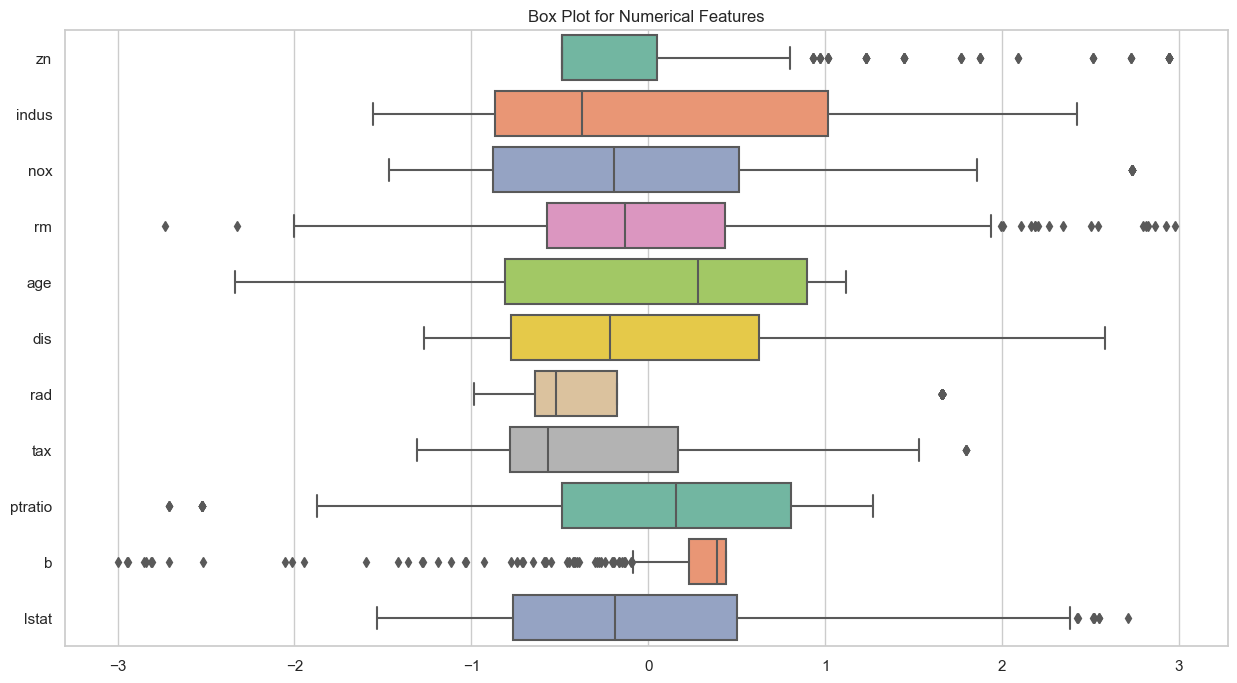

In [29]:
# Task -4 Explore the data with visualisations such as histograms and correlation matrices

# For this task, we want to explore all the columns of the dataset using boxplot, histogram and correlation matrix.

# Set the style for the plots
sns.set(style="whitegrid")

# Box plot for numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns], orient="h", palette="Set2")
plt.title('Box Plot for Numerical Features')
plt.show()

<Figure size 1500x1000 with 0 Axes>

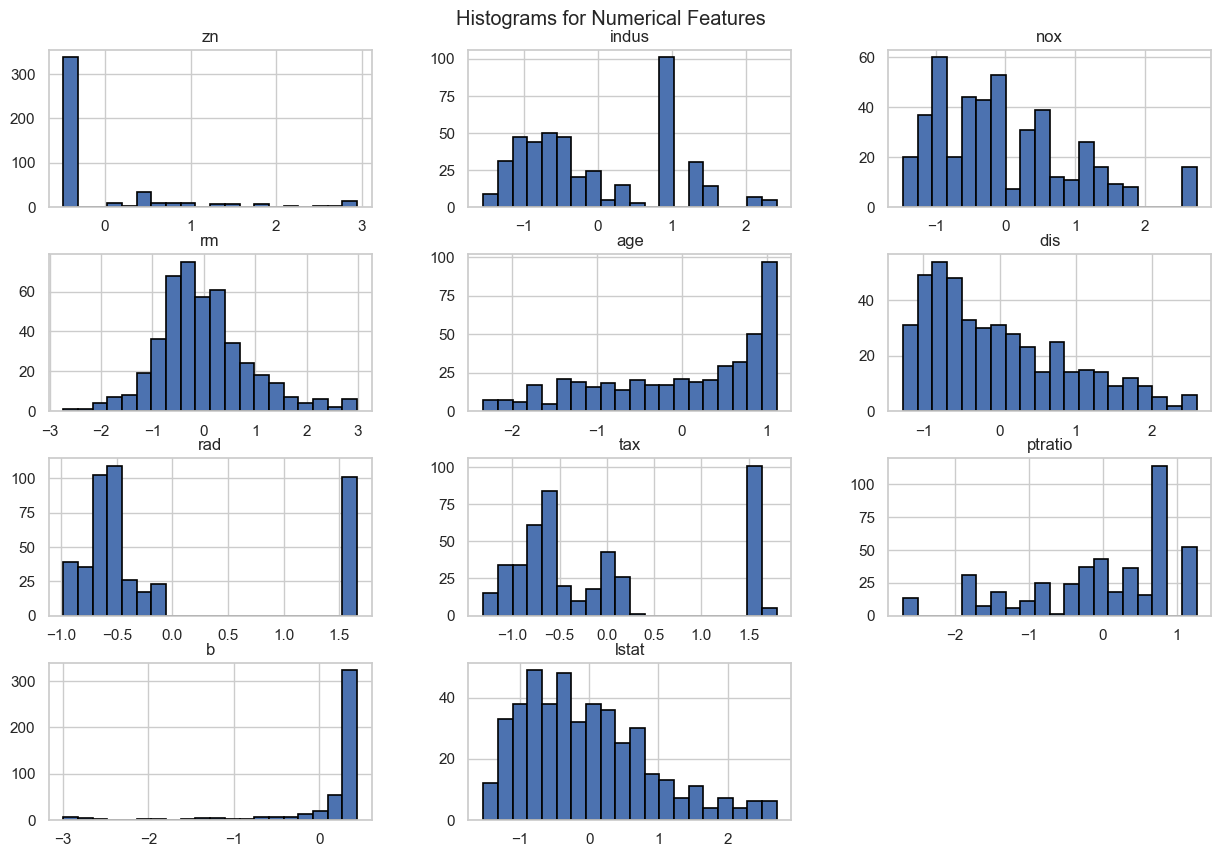

In [30]:
# Histograms for numerical features
plt.figure(figsize=(15, 10))
df[numerical_columns].hist(bins=20, figsize=(15, 10), edgecolor='black', linewidth=1.2)
plt.suptitle('Histograms for Numerical Features', y=0.92)
plt.show()

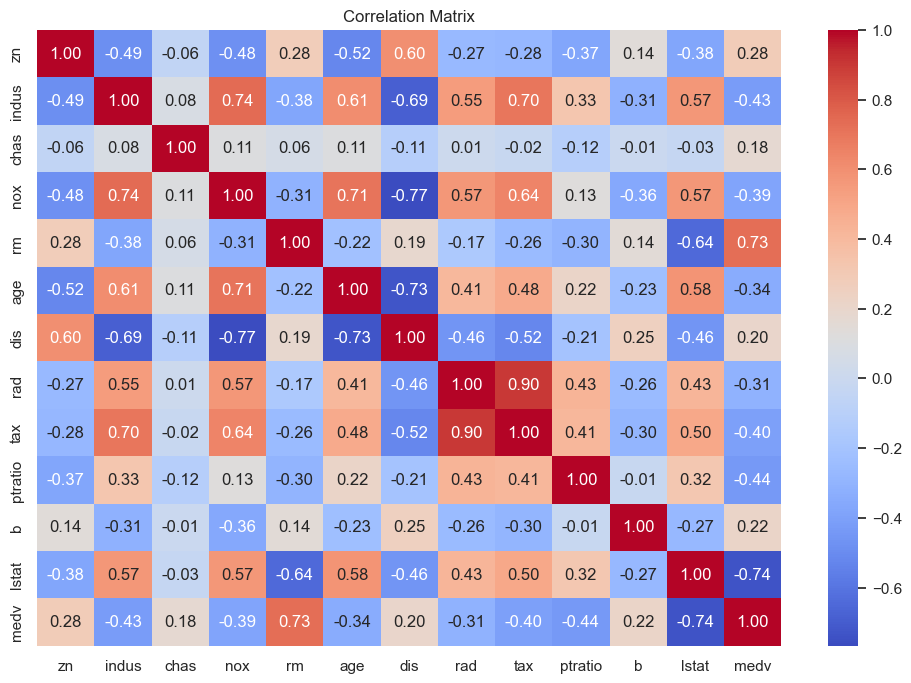

In [31]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Task 5 Split the independent variables from the dependent variable

# this is for the whole dataset to start with.

X = df.drop('medv', axis=1)  # Independent variables
y = df['medv']  # Dependent variable

In [33]:
print("Independent Variables (X):")
print(X.head())  # Display the first few rows of X

print("\nDependent Variable (y):")
print(y.head())  # Display the first few rows of y

Independent Variables (X):
               zn     indus  chas       nox        rm       age       dis  \
crim                                                                        
0.00632  0.284830 -1.287909     0 -0.144217  0.413672 -0.120013  0.140214   
0.02731 -0.487722 -0.593381     0 -0.740262  0.194274  0.367166  0.557160   
0.02729 -0.487722 -0.593381     0 -0.740262  1.282714 -0.265812  0.557160   
0.03237 -0.487722 -1.306878     0 -0.835284  1.016303 -0.809889  1.077737   
0.06905 -0.487722 -1.306878     0 -0.835284  1.228577 -0.511180  1.077737   

              rad       tax   ptratio         b     lstat  
crim                                                       
0.00632 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
0.02731 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
0.02729 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
0.03237 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
0.06905 -0.752922 -1.106115  0.113032  0.441052 -1.026501  

Dependent Va

In [34]:
# Task 6 Explore relationships between the independent and dependent variables

# Calculate the correlation coefficients between all pairs of variables. Positive or negative values indicate the direction of the relationship.
correlation_matrix = df.corr()
print(correlation_matrix)

               zn     indus      chas       nox        rm       age       dis  \
zn       1.000000 -0.487194 -0.055032 -0.479450  0.281480 -0.521031  0.604106   
indus   -0.487194  1.000000  0.077458  0.742437 -0.375409  0.608263 -0.686987   
chas    -0.055032  0.077458  1.000000  0.107383  0.060193  0.106054 -0.114844   
nox     -0.479450  0.742437  0.107383  1.000000 -0.309624  0.706958 -0.767121   
rm       0.281480 -0.375409  0.060193 -0.309624  1.000000 -0.215045  0.189177   
age     -0.521031  0.608263  0.106054  0.706958 -0.215045  1.000000 -0.725995   
dis      0.604106 -0.686987 -0.114844 -0.767121  0.189177 -0.725995  1.000000   
rad     -0.269727  0.547778  0.009164  0.570356 -0.165947  0.408009 -0.459352   
tax     -0.283855  0.699393 -0.020817  0.644280 -0.258183  0.477554 -0.523619   
ptratio -0.374548  0.328198 -0.116746  0.128211 -0.302703  0.219300 -0.206182   
b        0.140925 -0.314018 -0.007008 -0.363895  0.144057 -0.230561  0.248847   
lstat   -0.375739  0.568895 

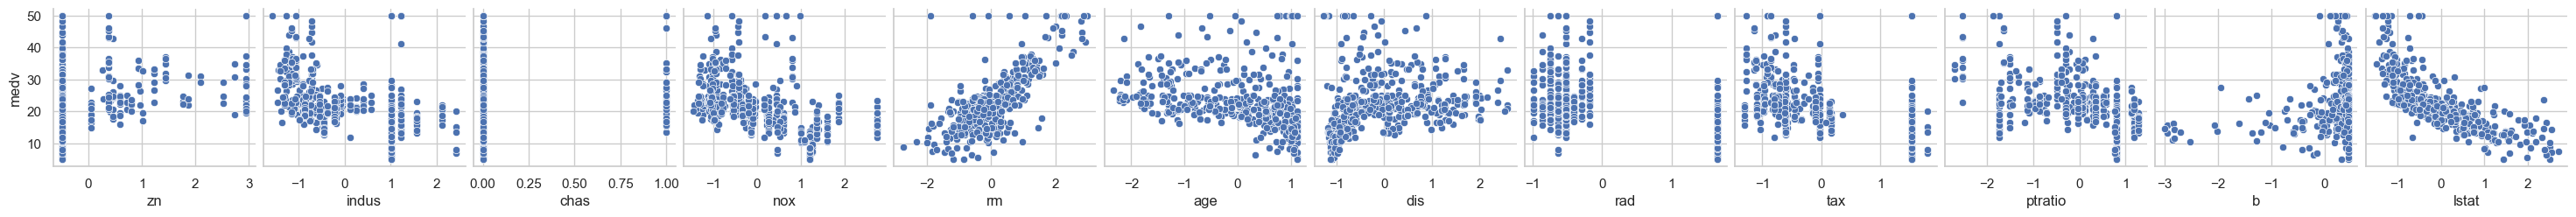

In [35]:
# Visualise pairwise relationships between numerical variables using a pairplot

sns.pairplot(df, x_vars=['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'], y_vars=['medv'])
plt.show()

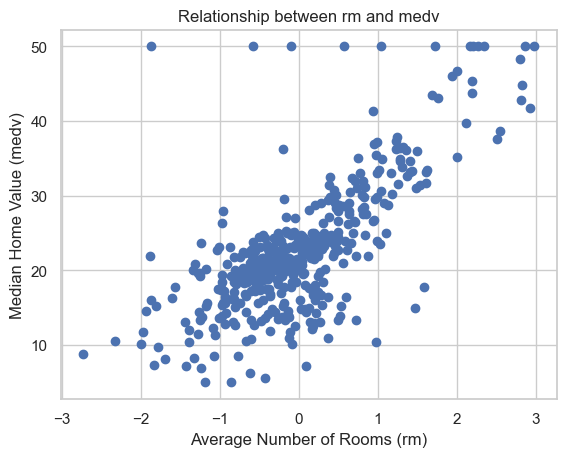

In [36]:
# Create scatter plots for specific variable pairs to visualise their relationships.
# We initially look at the average number of rooms (rm) vs Median Home Value (medv)

plt.scatter(df['rm'], df['medv'])
plt.xlabel('Average Number of Rooms (rm)')
plt.ylabel('Median Home Value (medv)')
plt.title('Relationship between rm and medv')
plt.show()


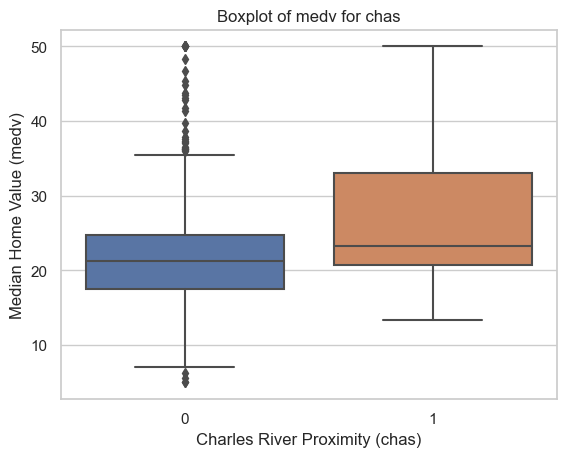

In [37]:
# Use boxplots to visualsze the distribution of the target variable for different categories.sns.boxplot(x='chas', y='medv', data=df)

plt.xlabel('Charles River Proximity (chas)')
plt.ylabel('Median Home Value (medv)')
plt.title('Boxplot of medv for chas')
plt.show()

In [38]:
# Task 7 Create a training and test set with a 75:25 split ratio

# Separate the independent variables (X) and the dependent variable (y)
X = df.drop('medv', axis=1)
y = df['medv']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (339, 12)
X_test shape: (113, 12)
y_train shape: (339,)
y_test shape: (113,)


In [39]:
# Task - 8 Build a multiple linear regression model using 'rm' and 'lstat'

# Select features 'rm' and 'lstat'
selected_features = ['rm', 'lstat']
X_selected = df[selected_features]

# Separate the independent variables (X) and the dependent variable (y)
y = df['medv']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Build the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the coefficients and intercept to check if we are on the right track. 
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 4.1600411  -4.35875915]
Intercept: 22.898744065843722


In [40]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model (you may choose a different metric based on your specific problem)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 15.858159102460952


In [41]:
# Print the model intercept and coefficients
# Print the model intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature}: {coef}")


Intercept: 22.898744065843722
Coefficients:
rm: 4.16004110273185
lstat: -4.358759149363124


In [42]:
# Task 9 Generate predictions for the test set

# Generate predictions for the test set
predictions = model.predict(X_test)

# Display the predicted values
print(predictions)

[17.23361181 29.82953522 21.86525435 28.19300512 25.40516764 16.62218776
 29.37364356 17.99666337 20.09421774 13.43345678 25.1754589  19.38530957
 12.72774954  7.01077049 11.09208735 25.61064907 19.61594697 28.03122777
 20.90675226 28.68669346 30.01919727 18.27326447 29.93371725 20.24760336
 24.23526709 21.71206812 26.62666907 12.41118879 18.51851931 18.830285
 10.54276118 29.71707686 22.43647432 22.77396174 20.34725702 22.63592638
 29.13002789 26.65575267 22.09397625 28.19992164 26.63500615 26.39894667
 21.83452196 23.28269164 14.4634257  22.77807563 25.78784398 21.81497433
 22.27371671 30.94780251 29.80479374 15.9590181  32.08328089 26.43158494
 18.56028211 18.96192764 20.88822031 20.30001092 22.7837806  19.86821498
 19.29311546 29.30775316 20.4327659  33.40539702 20.16796342 22.87672017
 18.02005818 21.7603618  26.63310988  9.59808909 21.38384034 22.20150747
 16.47871108 23.81491603 26.97359276 19.50816828 26.39442135 28.64621611
 19.10687648 19.3923354  23.98610079 32.03384298 29.9

In [43]:
# Create a DataFrame for actual and predicted values
prediction_table = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Display the table
print(prediction_table)

         Actual  Predicted
crim                      
0.31827    17.8  17.233612
0.02763    30.8  29.829535
4.26131    22.6  21.865254
0.06211    22.9  28.193005
1.34284    24.3  25.405168
...         ...        ...
0.12802    19.8  24.255091
0.24103    22.2  21.620064
0.02985    28.7  28.307864
0.17142    19.3  20.819820
1.83377    50.0  38.449349

[113 rows x 2 columns]


In [46]:
# Task 10 Evaluate the model

# The models are evaluated using MAE, MSE, RMSE, and R2

# Mean Absolute Error (MAE):
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error (MSE):
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Root Mean Squared Error (RMSE):
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# R-squared (R2)
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Absolute Error: 3.1601412336162524
Mean Squared Error: 15.858159102460952
Root Mean Squared Error: 3.9822304180522945
R-squared: 0.6545558116664368


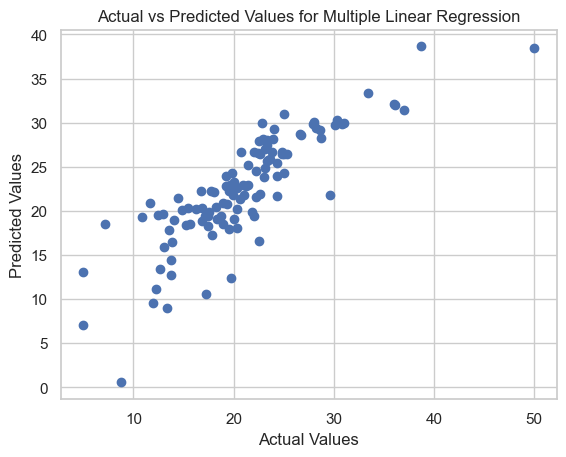

In [47]:
# Task 11 Generate a plot

# Plotting the actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Multiple Linear Regression')
plt.show()

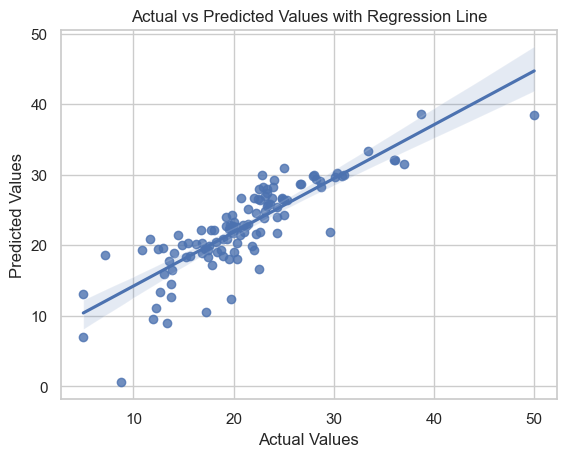

In [48]:
# For better visualisation, we generate a plot with regression line. 

# Combine the actual values and predictions into a DataFrame for seaborn
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Create a scatter plot with a regression line
sns.regplot(x='Actual', y='Predicted', data=plot_data)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Regression Line')
plt.show()

In [50]:
# Task 12  Print the coefficients

# Print the coefficients
print("Intercept:", model.intercept_)

# Coefficients for each feature
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients)

Intercept: 22.898744065843722

Coefficients:
  Feature  Coefficient
0      rm     4.160041
1   lstat    -4.358759


In [55]:
# Importing tabulate, so we can put the data in a table for better visaulisation

from tabulate import tabulate

# Coefficients
coefficients = pd.DataFrame({'Feature': ['Intercept', 'rm', 'lstat'],
                             'Coefficient': [model.intercept_,model.coef_[0],model.coef_[1]]})

# Display coefficients in a table
print(tabulate(coefficients, headers='keys', tablefmt='pretty', showindex=False))

+-----------+--------------------+
|  Feature  |    Coefficient     |
+-----------+--------------------+
| Intercept | 22.898744065843722 |
|    rm     |  4.16004110273185  |
|   lstat   | -4.358759149363124 |
+-----------+--------------------+


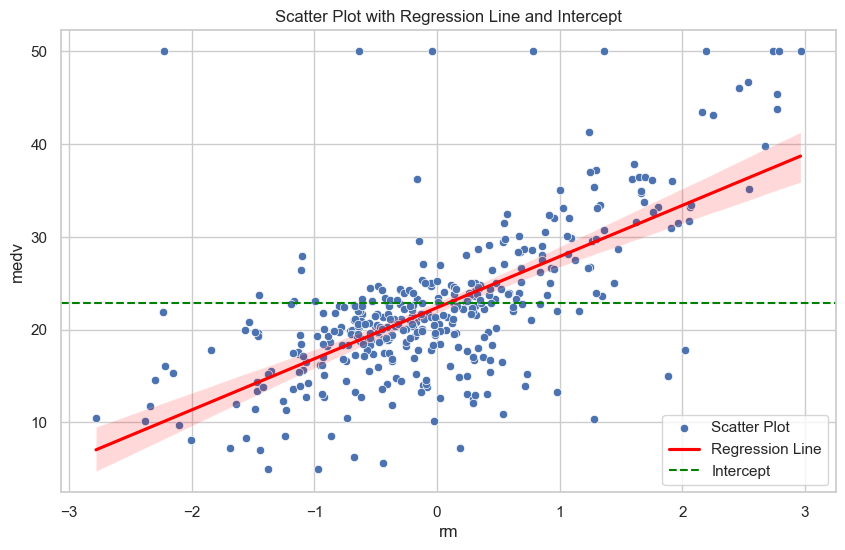

In [74]:
# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='rm', y='medv', data=df, label='Scatter Plot')
# Regression line
sns.regplot(x='rm', y='medv', data=df, scatter=False, color='red', label='Regression Line')

# Intercept line
plt.axhline(y=model.intercept_, color='green', linestyle='--', label='Intercept')

# Labels and title
plt.xlabel('rm')
plt.ylabel('medv')
plt.title('Scatter Plot with Regression Line and Intercept')

# Legend
plt.legend()

# Show plot
plt.show()

Task 13 **Interpret coefficients in the context of the prediction:**

The linear regression model predicts housing prices based on two features: 'rm' (average number of rooms per dwelling) and 'lstat' (percentage of lower status of the population). The intercept of 22.90 represents the predicted price when both features are zero, though such values are not meaningful in this context. For each additional room ('rm'), the predicted price is expected to increase by approximately 4.16, indicating a positive impact. Conversely, a one-unit increase in 'lstat' corresponds to a predicted price decrease of about 4.36, reflecting a negative influence.

Task 14 **Summarise findings**
To summarise, we create the below to visualise what we gather from the results. 
The analysis focused on predicting housing prices using a multiple linear regression model with features 'rm' (average number of rooms) and 'lstat' (percentage of lower status). The model exhibited an intercept of 22.90 and coefficients of approximately 4.16 for 'rm' and -4.36 for 'lstat'. This implies that an additional room positively influences housing prices, while higher lower-status percentage has a negative impact. 
The mean absolute error of 3.16 indicates, on average, the model's predictions deviate by approximately $3,160 from the actual housing prices. The mean squared error of 15.86 and root mean squared error of 3.98 provide insights into the overall model accuracy, with lower values suggesting better performance. The R-squared value of 0.65 signifies that the model explains 65.46% of the variance in the dependent variable. The intercept of 22.90 represents the estimated housing price when both 'rm' and 'lstat' are zero. Coefficients reveal that each additional room ('rm') contributes positively, while a higher percentage of lower status ('lstat') has a negative impact on housing prices.



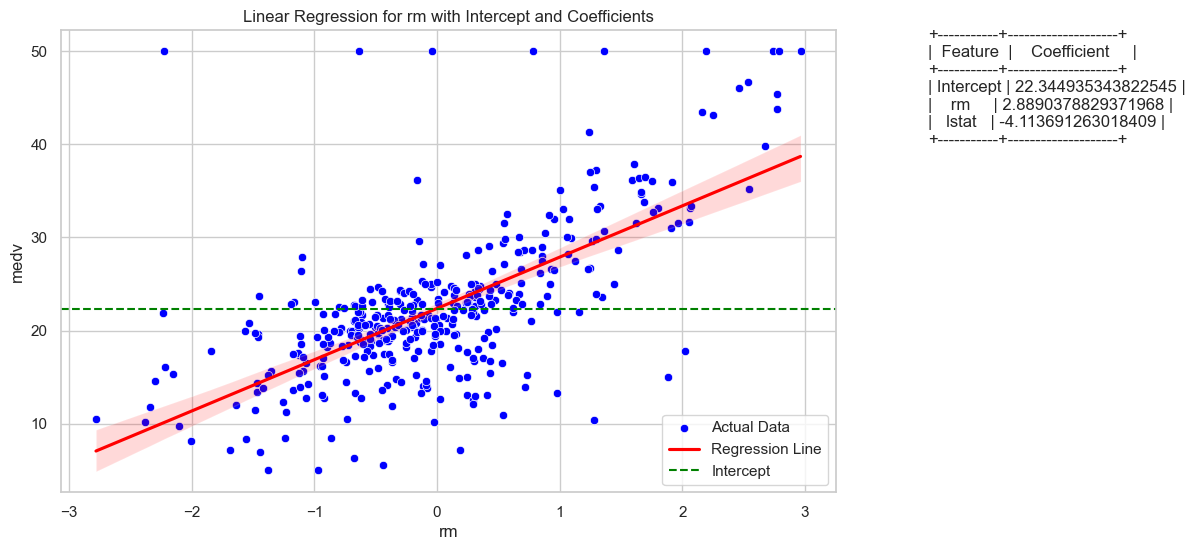

In [75]:
# Fit the linear regression model
linear_model = LinearRegression()
X_train = df[['rm', 'lstat']]
y_train = df['medv']
linear_model.fit(X_train, y_train)

# Scatter plot for 'rm' and 'medv'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rm', y='medv', data=df, color='blue', label='Actual Data')

# Plotting regression line for 'rm'
sns.regplot(x='rm', y='medv', data=df, scatter=False, color='red', label='Regression Line')

# Highlighting the intercept
plt.axhline(y=linear_model.intercept_, color='green', linestyle='--', label='Intercept')

# Adding coefficients as text
coefficients_table = tabulate({'Feature': ['Intercept', 'rm', 'lstat'],
                               'Coefficient': [linear_model.intercept_, linear_model.coef_[0], linear_model.coef_[1]]},
                              headers='keys', tablefmt='pretty', showindex=False)
plt.text(4, 40, coefficients_table, bbox=dict(boxstyle="round,pad=0.3", edgecolor="white", facecolor="white"))

# Labeling and displaying the plot
plt.title('Linear Regression for rm with Intercept and Coefficients')
plt.xlabel('rm')
plt.ylabel('medv')
plt.legend()
plt.show()